# Análise exploratória de dados

In [1]:
import pandas as pd

## 1. Descrição dos dados

![Graphical Abstract.png](<attachment:Graphical Abstract.png>)

Uma das coisas mais importantes para qualquer tipo de negócio é que os clientes continuem uitlizando seus produtos. Bancos enfrentam o desafio de reduzir a perda de clientes. A rotatividade de clientes do banco, refere-se à taxa na qual os clientes decidem encerrar seu relacionamento com a instituição financeira, também conhecido como churn. Entender essa rotatividade, e como reduzi-lá, é importante para as empresas que buscam expandir seus negócios e construir vínculos com os clientes.
Por isso urge a necessidade de compreender e explorar estratégias que irão fazer com que o banco mantenha seus clientes.
Para isso, a análise dos dados é a principal ferramenta para identificar padrões e fatores associados ao problema para, a partir disso, tomar ações com objetivo de mitigá-lo.
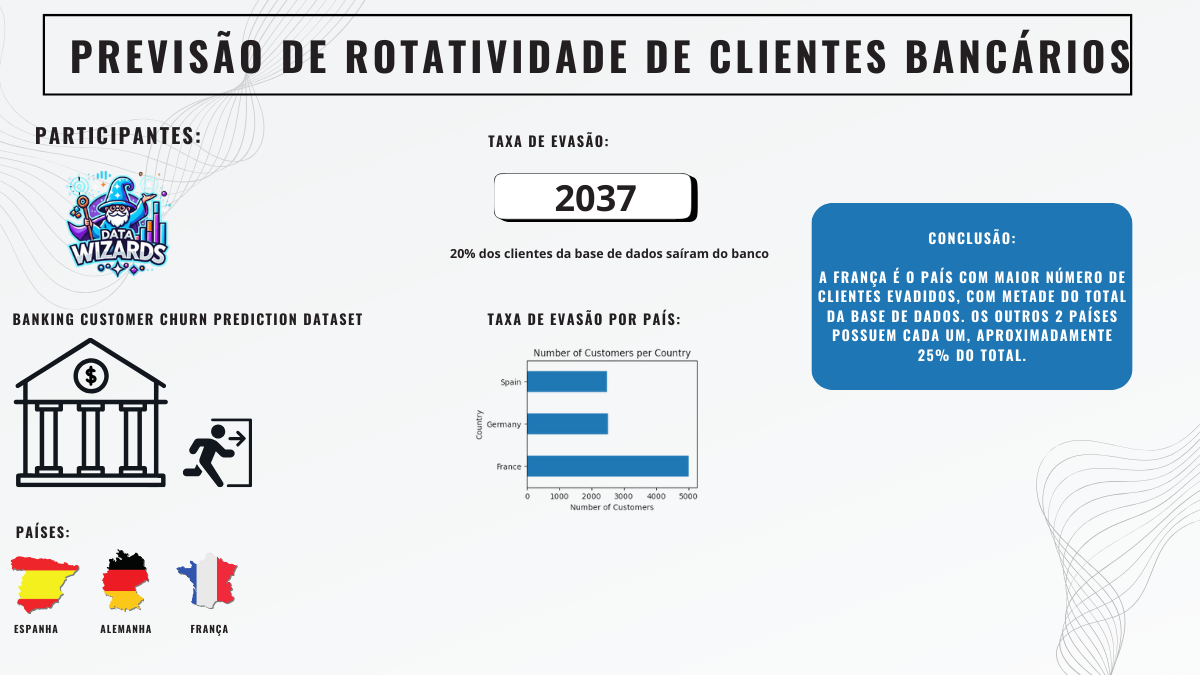

## 2. Perguntas de partida e hipóteses

In [ ]:
Qual a taxa de evasão?

Qual país com mais clientes evadidos?

O credit score baixo influencia os clientes desistem do banco?

Clientes com cartão de crédito tendem a permanecer no banco?

Qual variavel tem maior correlação com a permanência do cliente?

Qual faixa etaria possui maior evasão?

## 3. Insights